# Projeto DIO COVID-19

## Instalação de biblioteca

In [57]:
#opcional: instalado por falha na importacao do Plotly, msg modulo inexistente
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#opcional: pcufflinks concecta o Pandas ao Plotly.
!pip install cufflinks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importar bibliotecas do Python

In [59]:
import pandas as pd
import numpy as np
from datetime import datetime

In [60]:
#bibliotecas de visualização com recrusos em java script
import plotly.express as px  
import plotly.graph_objects as go 

## Importar e visualizar o conjunto de dados

In [61]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving covid_19_data.csv to covid_19_data.csv


In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
#importa campos como data e não como texto
df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update']) 

In [64]:
#chama o conjunto de dados para visualização em javascript
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [65]:
# Renomeando a tabela
df = df.rename(columns={"SNo":"Numero De Serie","ObservationDate":"Data De Observacao","Province/State":"Cidade/Estado","Country/Region":"Pais/Regiao","Last Update":"Ultima Atualização","Confirmed":"Confirmados","Deaths":"Obitos","Recovered":"Recuperados"})

In [66]:
df

,Numero De Serie,Data De Observacao,Cidade/Estado,Pais/Regiao,Ultima Atualização,Confirmados,Obitos,Recuperados
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


## Conferência dos tipos de variáveis por coluna

In [67]:
df.dtypes

Numero De Serie                int64
Data De Observacao    datetime64[ns]
Cidade/Estado                 object
Pais/Regiao                   object
Ultima Atualização    datetime64[ns]
Confirmados                  float64
Obitos                       float64
Recuperados                  float64
dtype: object

## Limpeza nos nomes das colunas

In [68]:
import re   

def corrige_colunas(col_name):  #correcao para eliminar caracteres especiais, maiúsculas, espaços em branco
    return re.sub(r"[/ | ]", "", col_name).lower()  #padrão de escrita das colunas é letra minúscula

In [69]:
corrige_colunas('AvqO/C  ou')   #teste da correcao

'avqocou'

In [70]:
df.columns = [corrige_colunas(col) for col in df.columns] #lista as colunas, depois atribui novos nomes
df

,numerodeserie,datadeobservacao,cidadeestado,paisregiao,ultimaatualização,confirmados,obitos,recuperados
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


## Exploração de amostras de dados 

In [71]:
df.paisregiao.value_counts()   #listagem de 5 primeiros e 5 últimos países

Russia                 30251
US                     26740
Japan                  18059
Mainland China         15758
India                  13182
                       ...  
 Azerbaijan                1
North Ireland              1
Republic of Ireland        1
Cape Verde                 1
East Timor                 1
Name: paisregiao, Length: 229, dtype: int64

In [72]:
df.paisregiao.unique()  #listagem de todos os países

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'China', 'Kiribati', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada', 'Cambodia',
       'Sri Lanka', 'Ivory Coast', 'Germany', 'Finland',
       'United Arab Emirates', 'India', 'Italy', 'UK', 'Russia', 'Sweden',
       'Spain', 'Belgium', 'Others', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Iraq', 'Oman', 'Afghanistan', 'Bahrain', 'Kuwait', 'Austria',
       'Algeria', 'Croatia', 'Switzerland', 'Pakistan', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Denmark',
       'Estonia', 'Netherlands', 'San Marino', ' Azerbaijan', 'Belarus',
       'Iceland', 'Lithuania', 'New Zealand', 'Nigeria', 'North Ireland',
       'Ireland', 'Luxembourg', 'Monaco', 'Qatar', 'Ecuador',
       'Azerbaijan', 'Czech Republic', 'Armenia', 'Dominican Republic',
       'Indonesia', 'Portugal

In [73]:
df.loc[df.paisregiao == 'Brazil']  #selecao de amostra do Brasil

,numerodeserie,datadeobservacao,cidadeestado,paisregiao,ultimaatualização,confirmados,obitos,recuperados
84,85,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0


In [74]:
brasil = df.loc[  #seleção com loc é por nome 
    (df.paisregiao == 'Brazil') &
    (df.confirmados > 0)
]

In [75]:
brasil

,numerodeserie,datadeobservacao,cidadeestado,paisregiao,ultimaatualização,confirmados,obitos,recuperados
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2981,2982,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0


## Visualização de casos confirmados

In [76]:
px.line(brasil, 'datadeobservacao', 'confirmados', title="Casos confirmados no Brasil")
#gera e exibe gráfico de cados confirmados 

## Contagem de novos casos por dia

In [77]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil ['confirmados'].iloc[x] - brasil['confirmados'].iloc[x-1],
    np.arange(brasil.shape[0]) 
))  #pode desconsiderar a advertencia sobre sintaxe, porque a função está criada e nao intere.     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
brasil

,numerodeserie,datadeobservacao,cidadeestado,paisregiao,ultimaatualização,confirmados,obitos,recuperados,novoscasos
2525,2526,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2631,2632,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2742,2743,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2852,2853,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2981,2982,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
306272,306273,2021-05-29,Roraima,Brazil,2021-05-30 04:20:55,103222.0,1635.0,96188.0,-125763.0
306290,306291,2021-05-29,Santa Catarina,Brazil,2021-05-30 04:20:55,965277.0,15174.0,921496.0,862055.0
306292,306293,2021-05-29,Sao Paulo,Brazil,2021-05-30 04:20:55,3254893.0,111123.0,2895697.0,2289616.0
306298,306299,2021-05-29,Sergipe,Brazil,2021-05-30 04:20:55,233932.0,5054.0,208146.0,-3020961.0


## Visualização de novos casos por dia

In [79]:
px.line(brasil, x='datadeobservacao', y='novoscasos', title="Novos casos por dia")

## Visualização de casos de óbito por dia

In [80]:
fig = go.Figure() #criacao de figura 

fig.add_trace(
        go.Scatter(x=brasil.datadeobservacao, y=brasil.obitos, name='Óbitos',
                  mode="lines+markers", line={'color':'blue'})
)
#criacao do layout
fig.update_layout(title="Óbitos por COVID-19 no Brasil")

fig.show()

## Cálculo da taxa média de crescimento de casos

In [81]:
# taxa_crescimento = (presente/passado)**(1/n) - 1
def taxa_crescimento(data, variable, data_inicio = None, data_fim = None):
    #Se data_inicio for none, define com a primeira data disponivel.
    if data_inicio == None:
        data_inicio = data.datadeobservacao.loc[data[variable] > 0].min() #minima data tem ao menos 1 caso
    else:
        data_inicio = pd.to_datetime(data_inicio) #passa a data como string ou texto
    
    if data_fim == None:
        data_fim = data.datadeobservacao.iloc[-1] #passa a ultima data
    else:
        data_fim = pd.to_datetime(data_fim)
        
    #Definição de valores do presente e passado
    passado = data.loc[data.datadeobservacao == data_inicio, variable].values[0]
    presente = data.loc[data.datadeobservacao == data_fim, variable].values[0]
    
    #Definição do numero de pontos no tempo que serão avaliados
    n = (data_fim - data_inicio).days
    
    #Calculo da taxa de crescimento
    taxa = (presente/passado)**(1/n) -1 
    
    return taxa*100 #retorna a taxa em porcentagem       


In [82]:
#Taxa de crescimento médio do COVID no Brasil em todo o periodo
taxa_crescimento(brasil, 'confirmados')

2.5017409860536244

In [83]:
#Taxa de crecimento mpedio do COVID no Brasil por dia 
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    #Se data_inicio for none, define com a primeira data disponivel.
    if data_inicio == None:
        data_inicio = data.datadeobservacao.loc[data[variable] > 0].min() #minima data tem ao menos 1 caso
    else:
        data_inicio = pd.to_datetime(data_inicio) #passa a data como string ou texto
        
    data_fim = data.datadeobservacao.max()
    #Define nro de pontos no tempo que serao avaliados
    n = (data_fim - data_inicio).days
    
    #Taxa calculada de variacao de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100

In [84]:
tx_dia = taxa_crescimento_diaria(brasil, 'confirmados')

In [85]:
tx_dia

array([ 0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+02,  0.00000000e+00,
        2.25000000e+02,  0.00000000e+00,  5.38461538e+01,  2.50000000e+01,
        2.40000000e+01,  2.25806452e+01,  3.68421053e+01,  1.90384615e+02,
        0.00000000e+00,  7.28476821e+00,  2.34567901e+01,  6.05000000e+01,
        1.58878505e+01,  6.69354839e+01,  2.76972625e+01,  2.87515763e+01,
        5.14201763e+01,  2.44501940e+01,  1.67879418e+01,  1.36626613e+01,
        1.68754894e+01,  1.44723618e+01,  1.42522681e+01,  9.01639344e+00,
        7.58928571e+00,  2.48525879e+01,  1.95732027e+01,  1.76711527e+01,
        1.25808056e+01,  1.43992933e+01,  7.43243243e+00,  9.26325247e+00,
        1.54016939e+01,  1.52201796e+01,  1.18862090e+01,  8.54521335e+00,
        5.54537122e+00,  7.06807546e+00,  5.57858688e+00,  7.81903542e+00,
        1.21051382e+01,  7.43290960e+00,  1.07050123e+01,  8.83557983e+00,
        5.44492335e+00,  

In [86]:
#Preparação da plotagem do gráfico
primeiro_dia = brasil.datadeobservacao.loc[brasil.confirmados > 0].min()

px.line(x=pd.date_range(primeiro_dia, brasil.datadeobservacao.max())[1:],
       y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil')

## Predições

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose #traz tendencia, sazonalidade, ruido
import matplotlib.pyplot as plt

In [48]:
confirmados = brasil.confirmados
confirmados.index = brasil.datadeobservacao
confirmados

datadeobservacao
2020-02-26          1.0
2020-02-27          1.0
2020-02-28          1.0
2020-02-29          2.0
2020-03-01          2.0
                ...    
2021-05-29     103222.0
2021-05-29     965277.0
2021-05-29    3254893.0
2021-05-29     233932.0
2021-05-29     177464.0
Name: confirmados, Length: 10209, dtype: float64

In [87]:
#Decomposição das series temporais
res = seasonal_decompose(confirmados)

ValueError: ignored

NameError: ignored

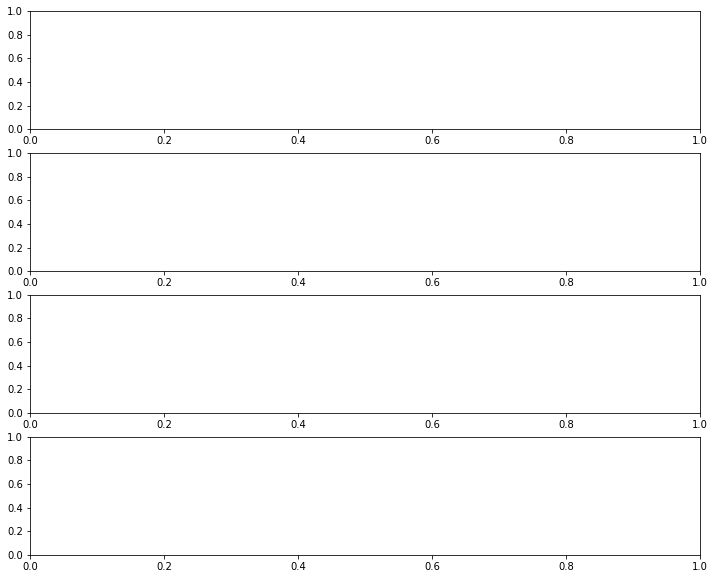

In [50]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,10))

ax1.plot(res.observed) #serie dos casos observados
ax2.plot(res.trend) #serie das tendencias
ax3.plot(res.seasonal) #serie da sazonalidade
ax4.plot(confirmados.index, res.resid) #serie do ruído
ax4.axhline(0, linestyle= 'dashed', c='black') #traça linha divisoria em zero
plt.show  #exibe graficos

# ARIMA

In [53]:
# Instalação de biblioteca
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima.arima import auto_arima
modelo = auto_arima(confirmados)


ImportError: ignored